In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from common import Fonts, Images, NWSL

In [2]:
xgoals = pd.read_csv("xgoals.csv")

In [17]:
metric = "for"
season = 2022
title = "Goals - xG"


def color(team):
    team = team.replace("NJY", "NJNY")
    if team in NWSL.COLORS:
        return NWSL.COLORS[team]
    else:
        return "blue"


def text_color(team):
    team = team.replace("NJY", "NJNY")
    if team in NWSL.TEXT_COLORS:
        return NWSL.TEXT_COLORS[team]
    else:
        return "white"


def name(team):
    team = team.replace("NJY", "NJNY")
    if team in NWSL.NAMES:
        return NWSL.NAMES[team]
    else:
        return team


def plot_violins(metric, season, title):
    # General
    plt.clf()
    plt.rcParams["figure.figsize"] = (16, 16)
    plt.figure(dpi=1200, facecolor="white")
    fig, ax = plt.subplots()
    fig.patch.set_facecolor("white")

    # Grab a specific season
    if season == "NWSL":
        subset = xgoals
    else:
        subset = xgoals[xgoals["season_name"] == season]

    # Compute the diff between goals and xG
    subset["goals_" + metric + "_diff"] = (
        subset["goals_" + metric] - subset["xgoals_" + metric]
    )

    # Get a list of teams ordered by the mean goals diff value
    teams = list(
        subset.groupby("team_abbreviation")
        .agg({"goals_" + metric + "_diff": "median"})
        .sort_values("goals_" + metric + "_diff", ascending=True)
        .index
    )

    # Build up the data for the boxplot
    data = [
        list(subset[subset["team_abbreviation"] == team]["goals_" + metric + "_diff"])
        for team in teams
    ]

    # Draw the plot
    plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)
    violin_parts = plt.violinplot(
        data, vert=False, showmedians=False, showextrema=False
    )

    # Customize colors
    for i, pc in enumerate(violin_parts["bodies"]):

        pc.set_facecolor(color(teams[i]))
        pc.set_edgecolor("white")
        pc.set_alpha(0.9)

    # Draw on the boxplot data
    lower_confidence = []
    quartile1 = []
    medians = []
    quartile3 = []
    upper_confidence = []
    for d in data:
        tiles = np.percentile(d, [2.5, 25, 50, 75, 97.5])
        lower_confidence.append(tiles[0])
        quartile1.append(tiles[1])
        medians.append(tiles[2])
        quartile3.append(tiles[3])
        upper_confidence.append(tiles[4])

    inds = np.arange(1, len(medians) + 1)
    ax.scatter(
        medians,
        inds,
        marker="o",
        color=[color(team) for team in teams],
        s=30,
        zorder=3,
    )
    ax.hlines(
        inds,
        quartile1,
        quartile3,
        color=[text_color(team) for team in teams],
        linestyle="-",
        lw=8,
    )
    ax.hlines(
        inds,
        lower_confidence,
        upper_confidence,
        color=[text_color(team) for team in teams],
        linestyle="-",
        lw=1,
    )

    # Add labels and title
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(axis="both", which="major", labelsize=16, length=0)
    ax.set_title(str(season) + " " + title, fontproperties=Fonts.BARLOW, size=48)
    ax.set_yticks(range(1, len(teams) + 1))
    ax.set_yticklabels(
        [name(team) for team in teams],
        fontproperties=Fonts.BARLOW,
        size=30,
    )

    # Save image
    plt.savefig(
        "xg_diff_" + metric + "_" + str(season) + ".png",
        bbox_inches="tight",
        pad_inches=0.5,
    )

<ipython-input-12-5acd18de31b4>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["goals_" + metric + "_diff"] = (


<Figure size 1152x1152 with 0 Axes>

<Figure size 19200x19200 with 0 Axes>

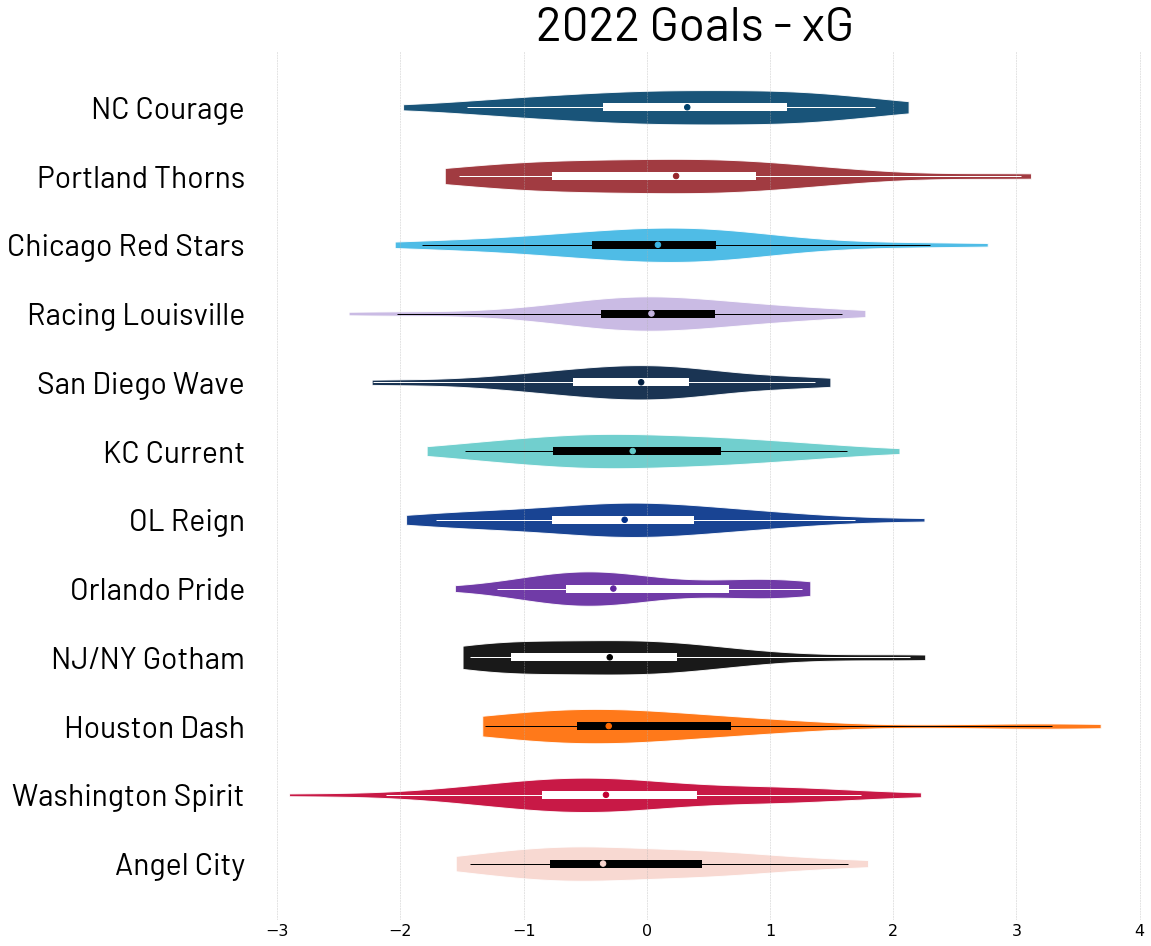

In [13]:
plot_violins("for", 2022, "Goals - xG")

<ipython-input-12-5acd18de31b4>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["goals_" + metric + "_diff"] = (


<Figure size 1152x1152 with 0 Axes>

<Figure size 19200x19200 with 0 Axes>

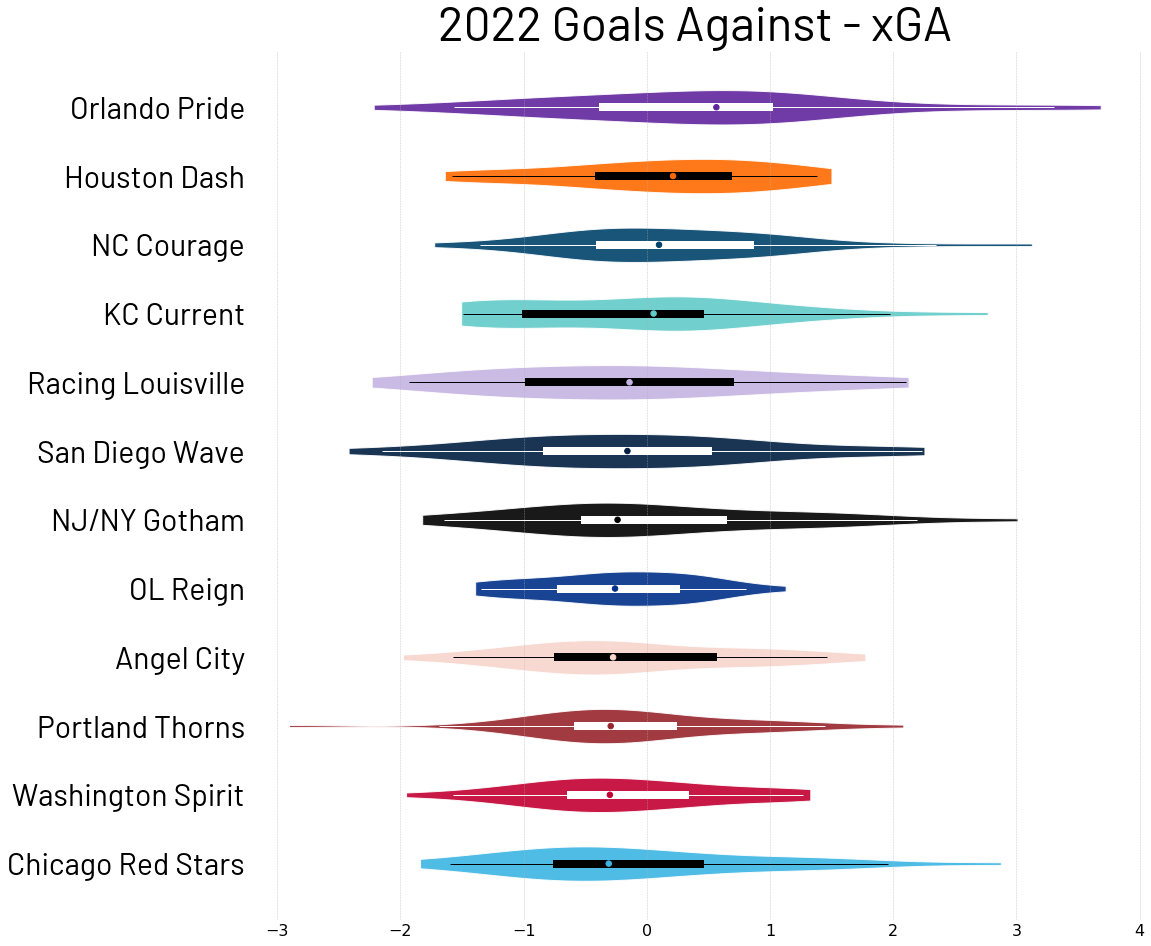

In [14]:
plot_violins("against", 2022, "Goals Against - xGA")

<Figure size 1152x1152 with 0 Axes>

<Figure size 19200x19200 with 0 Axes>

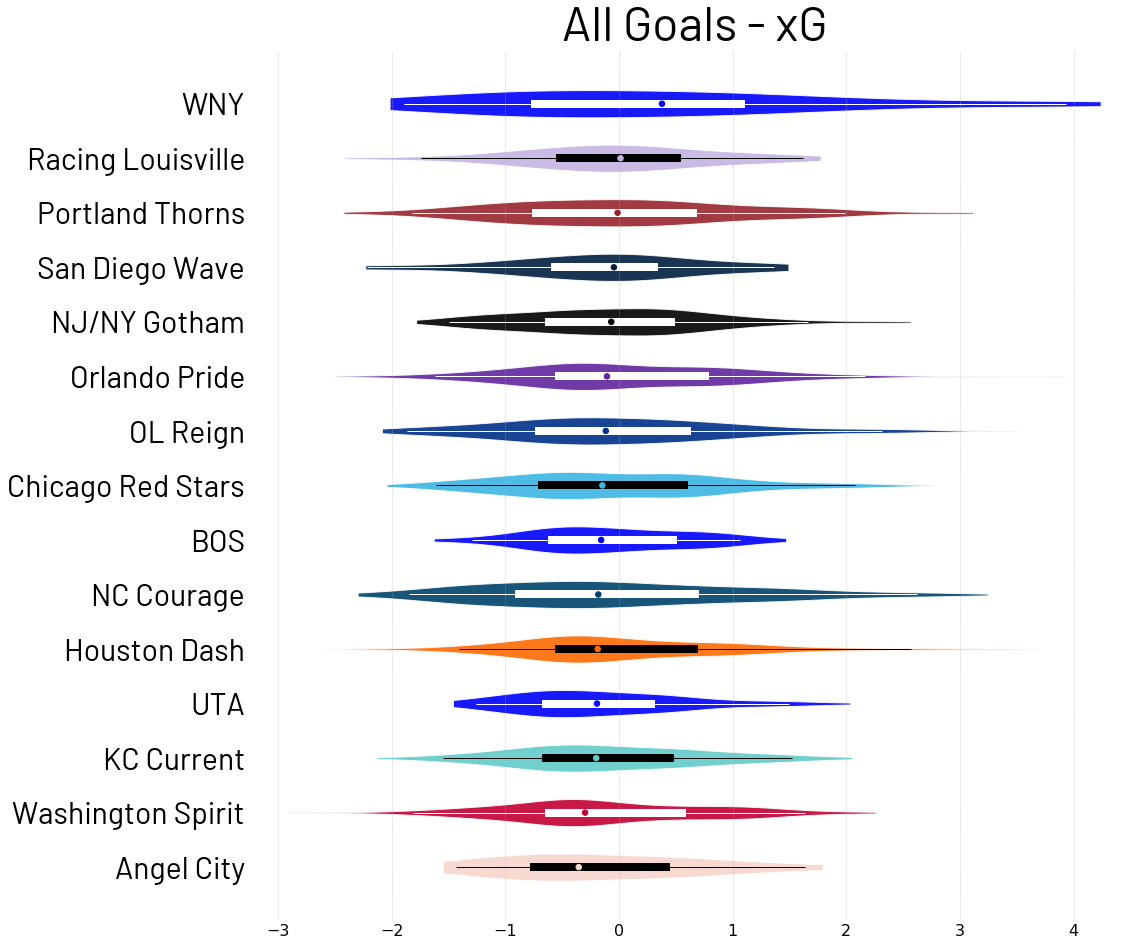

In [15]:
plot_violins("for", "NWSL", "Goals - xG")

<Figure size 1152x1152 with 0 Axes>

<Figure size 19200x19200 with 0 Axes>

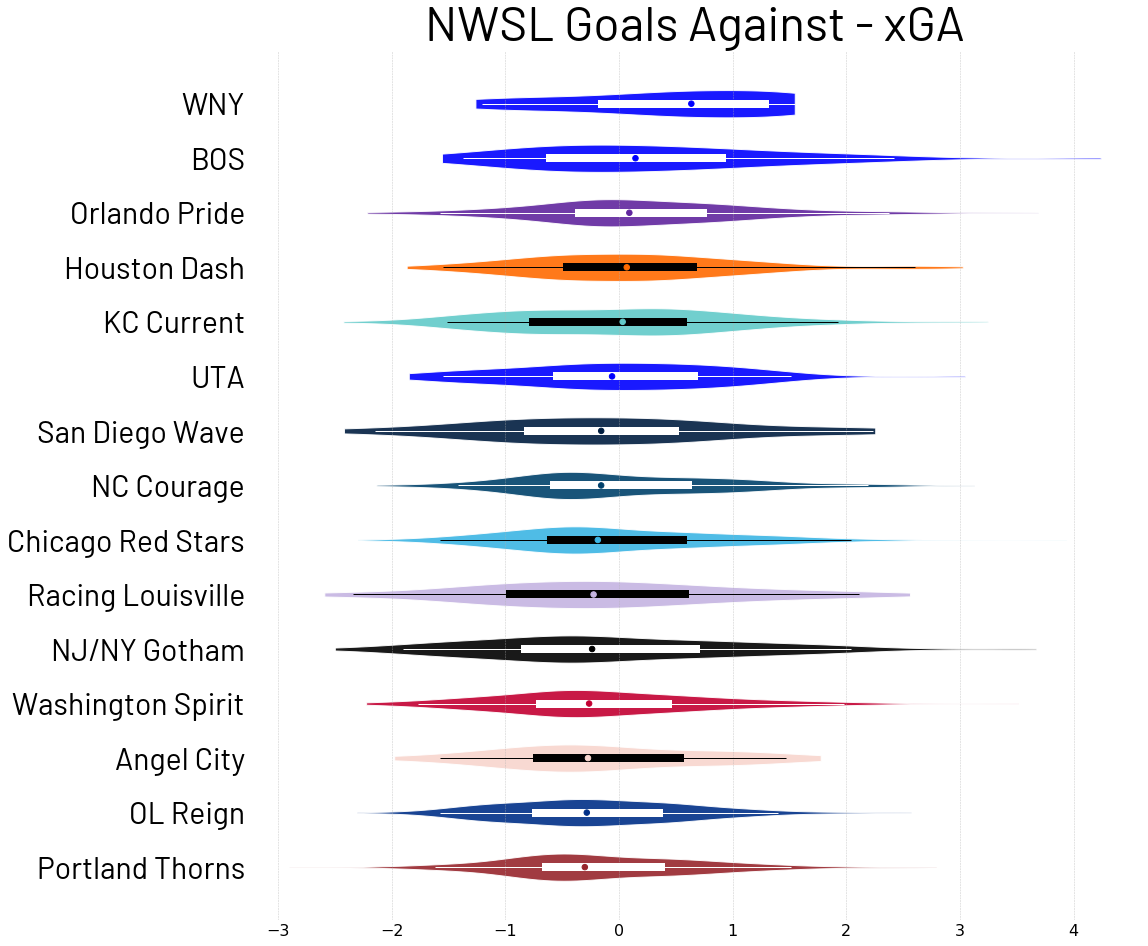

In [18]:
plot_violins("against", "NWSL", "Goals Against - xGA")